### Mini-Lab
Since we are changing datasets and this lab is about logistic Regression and SVM will will save you the indepths details of the data cleaning and why we made the choices we did.  We will show you all the steps it took to get to the dataset we will use for the rest of the lab.  we will be predicting if a car in the advertisements has over 100k miles.

    Scott Gozdzialski
    Adam Baca
    Zoheb Allam
    Ethan Graham
    

## Changes for resubmission

- 1 In the logistic regression section changed the model to remove the l2 penalty.  It made not difference in our model.
- 2 In the reduce the number of explanatory varibles removed the l2 penalty.  the penalty throws off the RFE feature selection making the model created pick random varibles and not the most accurate.
- 3 The Logistic Regression Interpertation section was rewritten to to fit the updated model. 
- 4 In the Support Vector Interpertation everything was rewritten to make more sense.
- 5 In the final Model Advantage section, we fixed the issues we had with our finla interpertation and updated it to fit the new model.

<span style="background-color: #FFFF00"> All non-code changes are highlighted in yellow

We will start by downloading and cleaning the dataset.

In [1]:
#Import the file of 3.5 Million records we will parse it down to 81000 usable records
import pandas as pd
import numpy as np
from __future__ import print_function
path = "~\\Desktop\\Cars.csv"

df = pd.read_csv(path,sep = ",")

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We change the date the ad was created and the date it was removed to a interger of the number of days the ad ran.

In [2]:
#Convert the date varibles into a delta between and type int
df.date_created = pd.to_datetime(df['date_created'])
df.date_last_seen = pd.to_datetime(df['date_last_seen'])
df['total_days'] = df['date_last_seen'] - df['date_created']
df.total_days = df['total_days'].dt.days.astype(int)

Dropping the columns we will not be using, Stk-year very close to model year, model takes up to much memory seperate and is unworkable and the dates are change above

In [3]:
df.drop(['stk_year','model','date_created','date_last_seen'], axis=1, inplace=True)

Removeing all records with NAs.  Since we have so many records this leaves us with over 82000 records

In [4]:
df = df.dropna()

Converting door count and seat count to ints.

In [5]:
df.door_count = df.door_count.replace('None','0')
df.door_count = df.door_count.astype(int)
df.seat_count = df.door_count.replace('None','0')
df.seat_count = df.door_count.astype(int)

Removing eronious information.  There are no vehicles with a 10cc engine.

In [6]:
df = df.sort_values('engine_displacement', ascending=False)
df = df[:82088]

df = df.sort_values('engine_power', ascending=False)
df = df[:81500]

OneHotEncoding maker, body type,color slug, and fuel type.  Turning Transmision binary. Removing the columns that we OneHotEncoded

In [7]:
tmp_df = pd.get_dummies(df.maker,prefix='Maker')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.body_type,prefix='Body type')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.color_slug,prefix='Color')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.fuel_type,prefix='Fuel')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

df['manual'] = df.transmission=='man' 
df.manual = df.manual.astype(np.int)

df.drop(['body_type','color_slug','fuel_type','maker','transmission'], axis= 1, inplace = True)

To re randomize the df for the test training slpit

In [8]:

from sklearn.utils import shuffle
df = shuffle(df)

Changing mileage to a binary of milage over 100K

In [9]:
from sklearn.model_selection import ShuffleSplit

df['mileage_100K'] = df['mileage'] > 100000

# we want to predict the X and y data as follows:

y = df['mileage_100K'].values # get the labels we want
del df['mileage_100K'] 
del df['mileage']# get rid of the class label
X = df.values # use everything else to predict!
    
num_cv_iterations = 10
num_instances = 81500
cv_object = ShuffleSplit(n_splits=num_cv_iterations,test_size  = 0.2)

## Logistic Regression

Now that the data is clean and ready us to run through a model we will run it though logistic regression with 10 fold cross validation.

In [10]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt


lr_clf = LogisticRegression() # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix")
    print(conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.776809815951
confusion matrix
[[3374 2437]
 [1201 9288]]
====Iteration 1  ====
accuracy 0.774417177914
confusion matrix
[[3385 2372]
 [1305 9238]]
====Iteration 2  ====
accuracy 0.769877300613
confusion matrix
[[3398 2389]
 [1362 9151]]
====Iteration 3  ====
accuracy 0.770858895706
confusion matrix
[[3408 2439]
 [1296 9157]]
====Iteration 4  ====
accuracy 0.775950920245
confusion matrix
[[3342 2359]
 [1293 9306]]
====Iteration 5  ====
accuracy 0.778404907975
confusion matrix
[[3354 2469]
 [1143 9334]]
====Iteration 6  ====
accuracy 0.775889570552
confusion matrix
[[3452 2419]
 [1234 9195]]
====Iteration 7  ====
accuracy 0.775950920245
confusion matrix
[[3351 2438]
 [1214 9297]]
====Iteration 8  ====
accuracy 0.773680981595
confusion matrix
[[3327 2492]
 [1197 9284]]
====Iteration 9  ====
accuracy 0.775644171779
confusion matrix
[[3410 2387]
 [1270 9233]]


In [12]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression() 
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.860245398773
[[4398 1399]
 [ 879 9624]]
manufacture_year has weight of -2.45877671111
price_eur has weight of -0.457223091819
Fuel_gasoline has weight of -0.440758911606
Maker_rolls-royce has weight of -0.315058131634
Body type_coupe has weight of -0.160429086981
Maker_lotus has weight of -0.153608535706
Maker_hyundai has weight of -0.137356522056
Body type_offroad has weight of -0.134607008885
Color_green has weight of -0.133228634514
Body type_convertible has weight of -0.125570688414
Color_red has weight of -0.0911177849569
Body type_compact has weight of -0.0858878362199
Color_beige has weight of -0.0725910664351
Maker_suzuki has weight of -0.0704658277817
Maker_kia has weight of -0.0702699091606
Maker_maserati has weight of -0.0701667068456
Maker_lamborghini has weight of -0.0587707817313
Maker_renault has weight of -0.053107114719
Maker_chevrolet has weight of -0.0529207198405
Maker_porsche has weight of -0.0423724251211
Maker_peugeot has weight of -0.0422490116492
Bo

This is alot of different variables to interpret.  You can see in the chart below, it has so much data is is unreadable. 

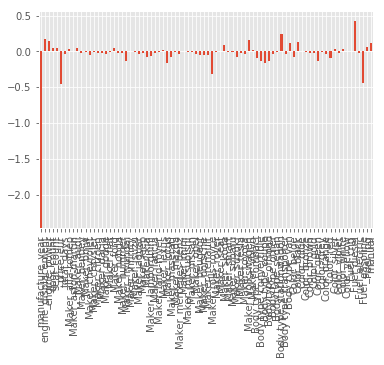

In [13]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

### Reduced the number of explanatory varibles.
The next step is to reduce the number of variables to a managable amount.  We are using 10 because that is enough to capture the data and make the model readable.  We use RFE (Recursive Featrue Elimination) because it works very well with logistic regression. <span style="background-color: #FFFF00">A note we had to remove the 'l2' penalty and C values, they confuse the RFE function and you get eratic results.

In [18]:
from sklearn.feature_selection import RFE

# create a base classifier used to evaluate a subset of attributes
lr_clf = LogisticRegression()
# create the RFE model and select attributes
rfe = RFE(lr_clf, 10)
rfe = rfe.fit(X[train_indices],y[train_indices])

dfnew = df.loc[:,rfe.support_]

X = dfnew.values # Use the reduced number of variables to predict

X_train = X[train_indices]
y_train = y[train_indices]
    
X_test = X[test_indices]
y_test = y[test_indices]

num_cv_iterations = 10
num_instances = 81500
cv_object = ShuffleSplit(n_splits=num_cv_iterations,test_size  = 0.2)


for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix \n",mt.confusion_matrix(y[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.748159509202
confusion matrix 
 [[2640 3177]
 [ 928 9555]]
====Iteration 1  ====
accuracy 0.745644171779
confusion matrix 
 [[2656 3143]
 [1003 9498]]
====Iteration 2  ====
accuracy 0.750797546012
confusion matrix 
 [[2627 3161]
 [ 901 9611]]
====Iteration 3  ====
accuracy 0.749079754601
confusion matrix 
 [[2647 3108]
 [ 982 9563]]
====Iteration 4  ====
accuracy 0.747852760736
confusion matrix 
 [[2685 3080]
 [1030 9505]]
====Iteration 5  ====
accuracy 0.742147239264
confusion matrix 
 [[2647 3234]
 [ 969 9450]]
====Iteration 6  ====
accuracy 0.745766871166
confusion matrix 
 [[2744 3162]
 [ 982 9412]]
====Iteration 7  ====
accuracy 0.748404907975
confusion matrix 
 [[2713 3094]
 [1007 9486]]
====Iteration 8  ====
accuracy 0.746134969325
confusion matrix 
 [[2683 3155]
 [ 983 9479]]
====Iteration 9  ====
accuracy 0.746564417178
confusion matrix 
 [[2682 3204]
 [ 927 9487]]


We now rescale the new data and print out coefficeints and odds ratios.

In [19]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,dfnew.columns) # combine attributes
zip_vars = sorted(zip_vars)

print("\nLogtisical Regression Coefficints of the variables kept")
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out
    
print('\n\nOdds Ratio')
for coef, name in zip_vars:
    oddsr = np.around(np.exp(coef[0]),decimals=2)
    print(name, "has an odds ratio of",oddsr)

accuracy: 0.821165644172
[[4244 1633]
 [1282 9141]]

Logtisical Regression Coefficints of the variables kept
manufacture_year has weight of -1.90084531102
price_eur has weight of -0.615816965757
engine_power has weight of -0.451394721159
Maker_aston-martin has weight of -0.0594536309221
total_days has weight of -0.00715178642149
Maker_alfa-romeo has weight of 0.0552132299915
Maker_audi has weight of 0.100640451313
door_count has weight of 0.154287358015
seat_count has weight of 0.154287358015
engine_displacement has weight of 1.02273912183


Odds Ratio
manufacture_year has an odds ratio of 0.15
price_eur has an odds ratio of 0.54
engine_power has an odds ratio of 0.64
Maker_aston-martin has an odds ratio of 0.94
total_days has an odds ratio of 0.99
Maker_alfa-romeo has an odds ratio of 1.06
Maker_audi has an odds ratio of 1.11
door_count has an odds ratio of 1.17
seat_count has an odds ratio of 1.17
engine_displacement has an odds ratio of 2.78


### Plot of the new variable list 

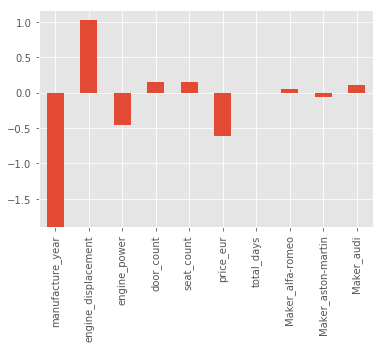

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=dfnew.columns)
weights.plot(kind='bar')
plt.show()

## Interpretation of the results

<span style="background-color: #FFFF00">The model above is built upon the RFE selection We dropped the model down to the 10 most important features for the prediction.   The orginal model with 82 features has a CV accuracy of 77% and the reduced featrues model has a CV accuracy of 74%.  When we run the test data through both models the orignal has an accuracy of 86% and the reduced has an accuracy of 82%.  With only a fraction of the features used the reduced model greatly decreases the chance of overfitting the data.  It also highlights the features that are most important to predicting if a car will have over 100K miles on it.  Most of those features are not manufacture specific, meaning that if new data is introduced of a vehicle from a manufacture not listed we will still have an accurate prediction of if it will have 100K miles of more.

<span style="background-color: #FFFF00">The first feature listed is Manufacture year, it has a 0.15 odds ratio, meaning for each year that the model year increases likelyhood of a car having over 100K miles decreases.  This makes sense as newer cars have had less time to accrue miles.

<span style="background-color: #FFFF00">The next feature is engine displacement, it has a 2.78 odds ratio, meaning as the engine size increases the lieklyhood of a car having over 100K miles increases also.  This is alittle confusing, some cars with big engines are collectors cars so you would think they stay of the road.  At the same time if they need repairs people will pay for them inorder of these vehicles to retain their value.  Finally trucks have large engines and they are used alot, so they aquire alot or miles.

<span style="background-color: #FFFF00">Next is engine power this follows along side engine displacement, but also includes vehicles with turbo and super chargers.  These are more liekley to be collector cars. It has an odd ratio of 0.64 meaning as engine power increase so does the chance of it having over 100K miles.

<span style="background-color: #FFFF00">Next is door count and seat count.  They are lumped together because they have the same odds ratio of 1.17, meaning as they increase so does the likelyhood that the car will have over 100K miles.  This is because most 2 door 2 seat cars are weekend cars.

<span style="background-color: #FFFF00">Now, price in euros has a 0.54 odds ratio, meaning as the price increases the cahnce a car has over 100K miles decreases.  This is probably related to the fact that people will not pay as much for an old vehicle with high mileage. 

<span style="background-color: #FFFF00">Total days had an odds ratio of 0.99 and seems to have no effect on the chance a vehicle has over 100K miles.  I think it would be appropiate to remove this feature completely if we had more time and more information.

<span style="background-color: #FFFF00">Finally we have the manufacutres Alfa romeo, Aston Martin, and Audi they have a respective odds ratio of 1.06, 0.94, an 1.11.  I am not sure why these features were picked and would need more data to determine why they are important to if a car has over 100K miles. 



### Visualization Using SVM with the Same Variables.

In [16]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [17]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.698159509202
[[ 1328  4441]
 [  479 10052]]


In [18]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(39536L, 10L)
(39536L,)
[19770 19766]


In [19]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['mileage'] = y[svm_clf.support_] # add back in the 'mileage' Column to the pandas dataframe
df['mileage'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39536 entries, 3068205 to 3187212
Data columns (total 83 columns):
manufacture_year          39536 non-null float64
engine_displacement       39536 non-null float64
engine_power              39536 non-null float64
door_count                39536 non-null int32
seat_count                39536 non-null int32
price_eur                 39536 non-null float64
total_days                39536 non-null int32
Maker_alfa-romeo          39536 non-null uint8
Maker_aston-martin        39536 non-null uint8
Maker_audi                39536 non-null uint8
Maker_bentley             39536 non-null uint8
Maker_bmw                 39536 non-null uint8
Maker_chevrolet           39536 non-null uint8
Maker_chrysler            39536 non-null uint8
Maker_citroen             39536 non-null uint8
Maker_dacia               39536 non-null uint8
Maker_dodge               39536 non-null uint8
Maker_fiat                39536 non-null uint8
Maker_ford                395

C:\Users\adamg_000\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


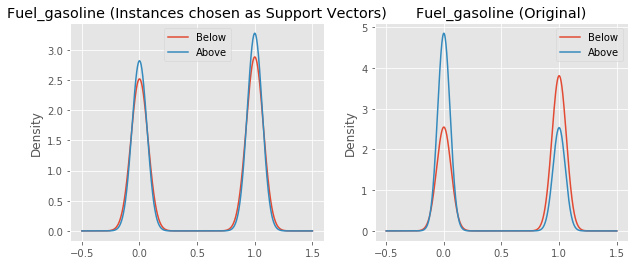

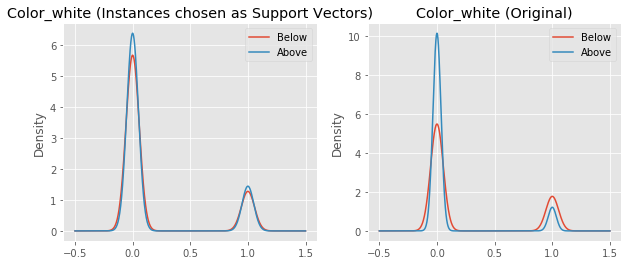

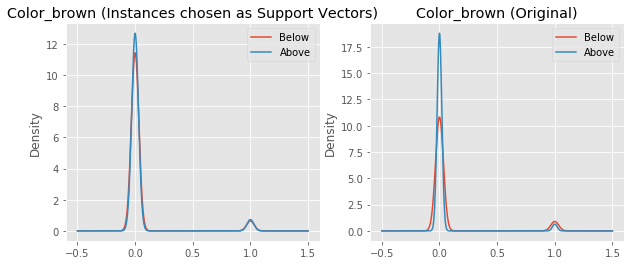

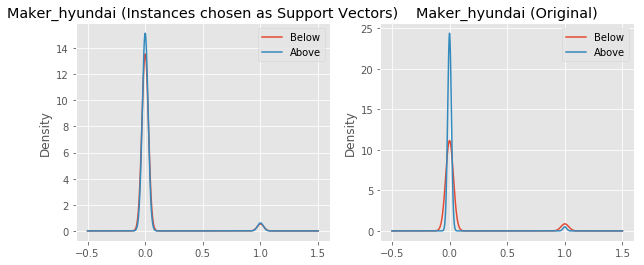

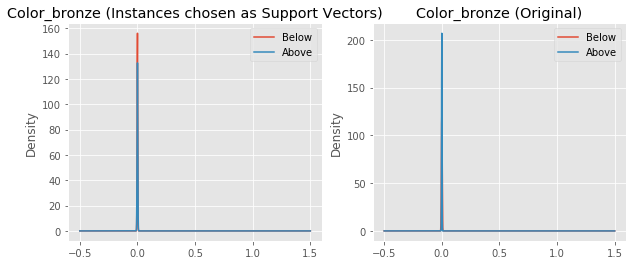

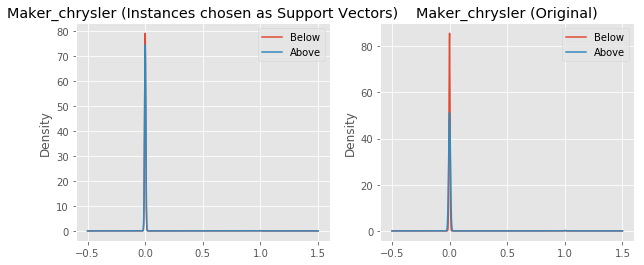

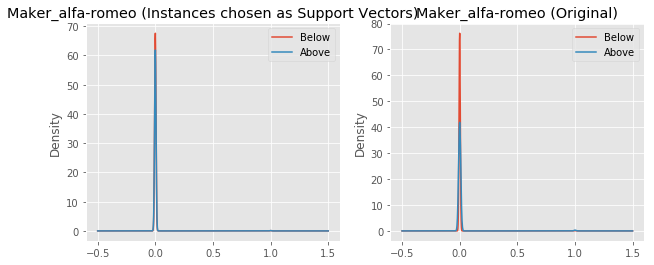

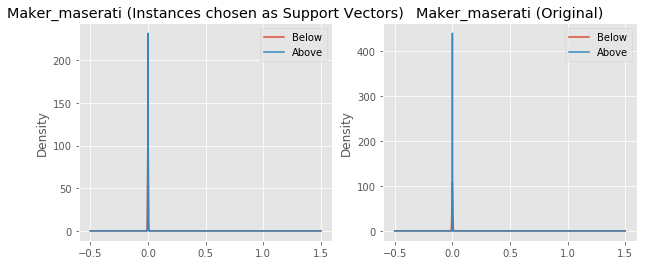

In [20]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['mileage'])
df_grouped = df.groupby(['mileage'])

# plot KDE of Different variables
#I had to remove Maker_rolls-royse and Maker_lamborghini from the model because they were so similar that they caused errors
vars_to_plot = ['Fuel_gasoline','Color_white','Color_brown','Maker_hyundai','Color_bronze','Maker_chrysler','Maker_alfa-romeo','Maker_maserati']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Below','Above'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Below','Above'])
    plt.title(v+' (Original)')

## Interpret Support Vector

<span style="background-color: #FFFF00">The support vector model is grouped into two groups, those with over 100 thousand miles and those with under 100 thousand miles. When we look at the visualizations here, it is important to remember that the data was one hot encoded so all of the variables are plotted to reflect a binary set. The right side of each visualization "1" indicated a present/"yes" value for the variable described. The left "0" indicates that the data does not align with the variable and rationally represents the rest of the data that doesn't meet the conditions specified.</span>

<span style="background-color: #FFFF00">The variables ised to make predictions here are the vehicle's fuel type, vehicle color, and the make of the vehicle listed for sale. Based on this model, these important features generated a 70% accuracy and it does look like fuel type provided the best results followed by color. The Logistic regression model clearly provided more accurate results.</span>

## Model Advantages

The initial logistic regression model we tested which included all the variables resulted in a prediction accuracy of <span style="background-color: #FFFF00">78%</span>, or in other words our model was able to predict <span style="background-color: #FFFF00"> 78% </span> of cases correctly. You would expect that number to be relatively high given the number of feature variables we entered into the model. As a general rule of thumb we know that more features results in an increase in accuracy. However, that resulted in a model that was difficult to interpret <span style="background-color: #FFFF00"> as the coefficients plot generated was difficult to understand due to the number of predictor variables in the model </span>. Therefore, we used RFE selection process to reduce the number of features in our model. 

The resulting model actually reduced the prediction accuracy from <span style="background-color: #FFFF00"> 78% to 75% </span>. However, <span style="background-color: #FFFF00"> the reduction in the number of predictor variables made the results more interpretable </span>. In addition, the model had a faster training time compared to our original logistic regression model. 

When comparing the results from the SVM model to the logistic regression, the prediction accuracy <span style="background-color: #FFFF00"> from the SVM model</span> is 70% compared to <span style="background-color: #FFFF00"> 75% from the logistic regression model </span>. <span style="background-color: #FFFF00"> Since the accuracy in the logistic regression model decreased by only 3% while the accuracy for the SVM model decreased by 8%, we concluded that the logistic regression model was more accurate </span>. 
